## The Spark Foundation - GRIP - DATA SCIENCE AND BUSINESS ANALYTICS Intern

Author : Devendra Jamliya

TASK 6: Create the Decision Tree classifier and visualize it graphically.

From the given iris dataset

USING : Decision Tree

#### Dataset used: Iris dataset, which is available in sklearn library.

Alternatively, it can be downloaded through the following link - https://bit.ly/2TK5Xn5

### Problem Statement

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

##### Load the CSV file 

In [12]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.shape

(150, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
 df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
print("Number of duplicate rows :",df.duplicated().sum(),".")

Number of duplicate rows : 0 .


### DATA VISUALIZATION

###### Box Plot: To Find Outliers

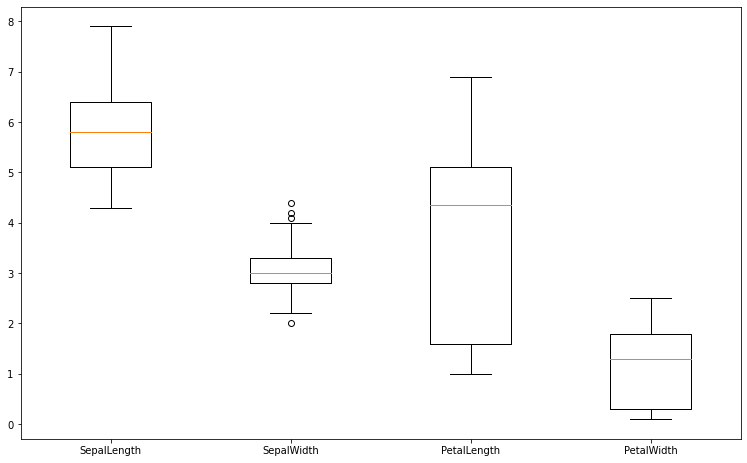

In [22]:
fig = plt.figure(figsize=(10,6))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

#Creating Plot
bp = ax.boxplot(df.drop(["Species","Id"],axis=1))

ax.set_xticklabels(['SepalLength','SepalWidth','PetalLength','PetalWidth'])

#show plot
plt.show()

In [24]:
## Treating outliers present in the SepalWidthCm column
q1,q3 = np.percentile(df['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)

C:\Users\Devendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

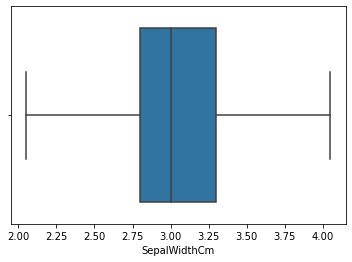

In [25]:
sns.boxplot(df['SepalWidthCm'])

### Distribution Plot 

C:\Users\Devendra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devendra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Devendra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

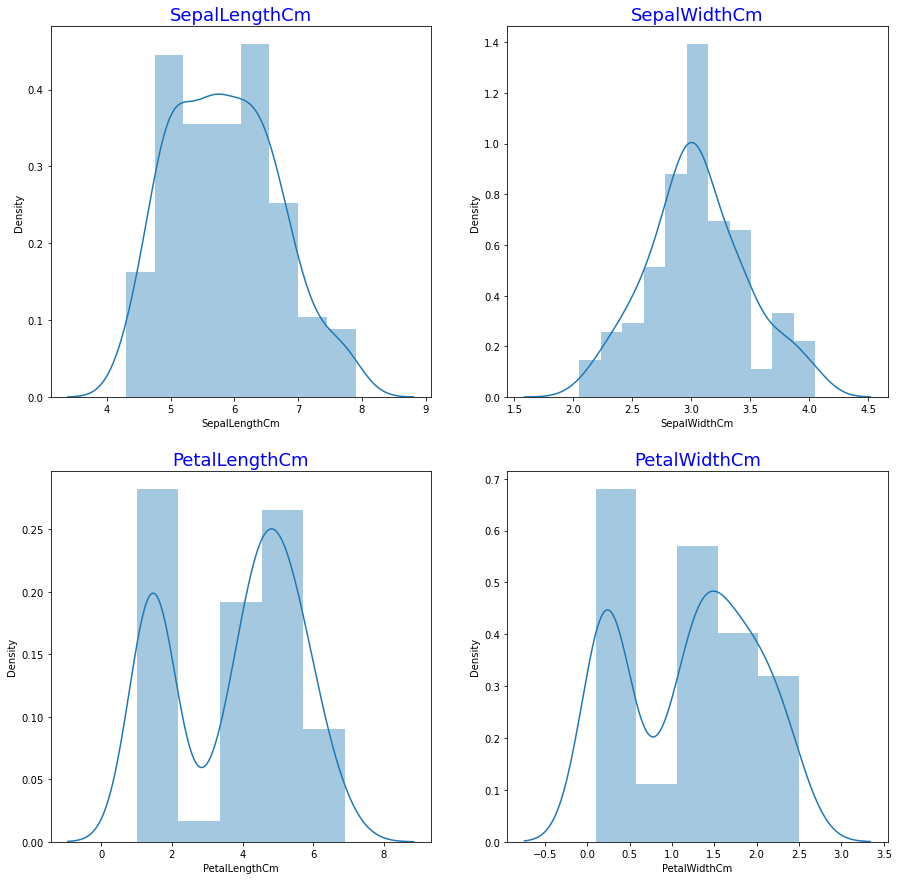

In [26]:
fig=plt.figure(figsize=(15,15))
for i in range(1,5):
    ax=fig.add_subplot(2,2,i)
    sns.distplot(df[df.columns[i]])
    ax.set_title(df.columns[i],color='blue',fontsize=18)
plt.show()

###  DATA INSPECTION: Encode the Target Variable Using Label Encoder

In [28]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
df["Target"]= encode.fit_transform(df["Species"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Target         150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


### Data Building : Divide The Data Set

In [29]:
X=df.drop(["Species","Id","Target"],axis=1)
y=df["Target"]
        

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.35,random_state=2021)
print(df.shape)
print("X_train shape=",X_train.shape)
print("Y_train shape=",Y_train.shape)
print("X_test shape=",X_test.shape)
print("Y_test shape=",Y_test.shape)

(150, 7)
X_train shape= (97, 4)
Y_train shape= (97,)
X_test shape= (53, 4)
Y_test shape= (53,)


### BUILDING MODEL : Train Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',max_depth=3)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

### DECISION TREE

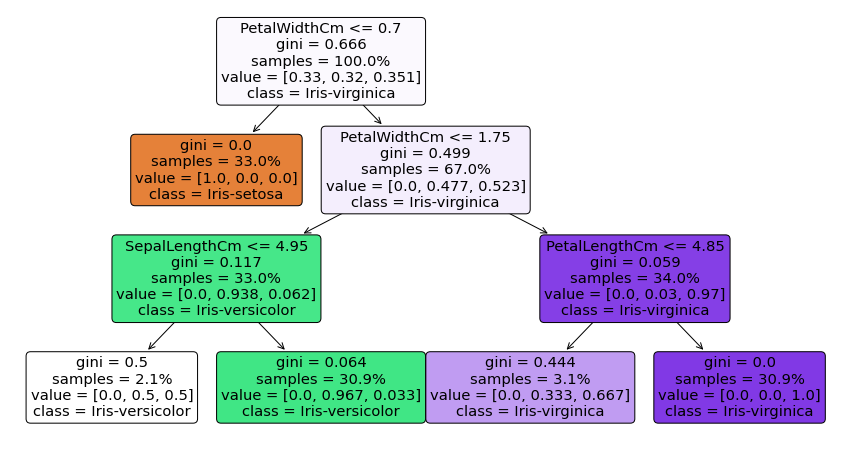

In [34]:
from sklearn import tree

FeatureNames=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize = (15,8))
tree.plot_tree(dtree, feature_names= FeatureNames , class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],filled = True, precision = 3,proportion =True, rounded = True)
plt.show()

### PREDICTION

In [35]:
y_pred=dtree.predict(X_test)
print(y_pred)
print('Iris-setosa=0 , Iris-versicolor=1, Iris-virginica=2')

[0 0 1 0 0 0 0 0 0 0 0 1 2 2 1 2 1 1 0 1 1 2 1 0 1 1 1 1 0 0 1 1 0 2 1 1 2
 0 2 1 2 2 0 1 1 1 2 2 1 1 2 0 2]
Iris-setosa=0 , Iris-versicolor=1, Iris-virginica=2


### EVALUATING MODEL

In [37]:
print("TESTING ACCURACY OF DECISION TREE MODEL={}%".format(round(dtree.score(X_test,Y_test)*100,2)))


TESTING ACCURACY OF DECISION TREE MODEL=94.34%


In [38]:
from sklearn import metrics
print('Mean Absolute Error:{}%'.format(round(metrics.mean_absolute_error(Y_test, y_pred)*100,3)))


Mean Absolute Error:5.66%


In [ ]:
 .